In [118]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Q.1: Import data and check null values, check column info and the descriptive statistics of the data.


                                         (1) Import Data

In [96]:
data=pd.read_csv("tips.csv")

                                         (2) Check Null Values

In [97]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

                                        (3) Check Column info

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


                                           (4) Descriptive Statistics of data

In [99]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Q.2: Have a look at the tips given to the waiters according to:
       the total bill paid
       number of people at a table
       and the day of the week

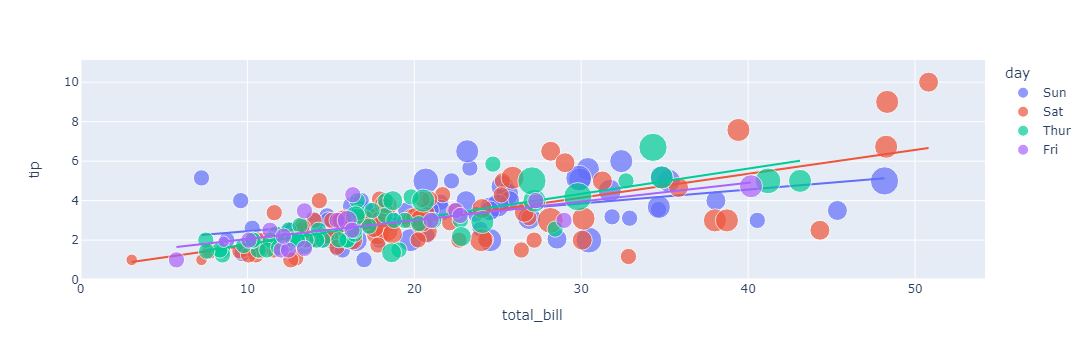

In [100]:
fig=px.scatter(data_frame=data,
           x='total_bill',
           y='tip',
           size='size',
           color='day',
           trendline='ols')
fig.show()

# Q.3: Have a look at the tips given to the waiters according to:
       the total bill paid
       the number of people at a table
       and the gender of the person paying the bill


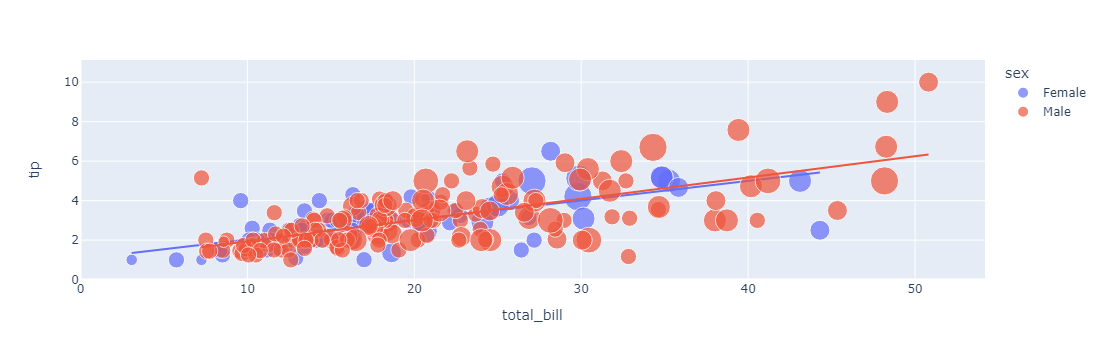

In [101]:
px.scatter(data_frame=data,
           x='total_bill',
           y='tip',
           size='size',
           color='sex',
           trendline='ols')
           

# Q.4: Have a look at the tips given to the waiters according to:
      the total bill paid
      the number of people at a table
      and the time of the meal


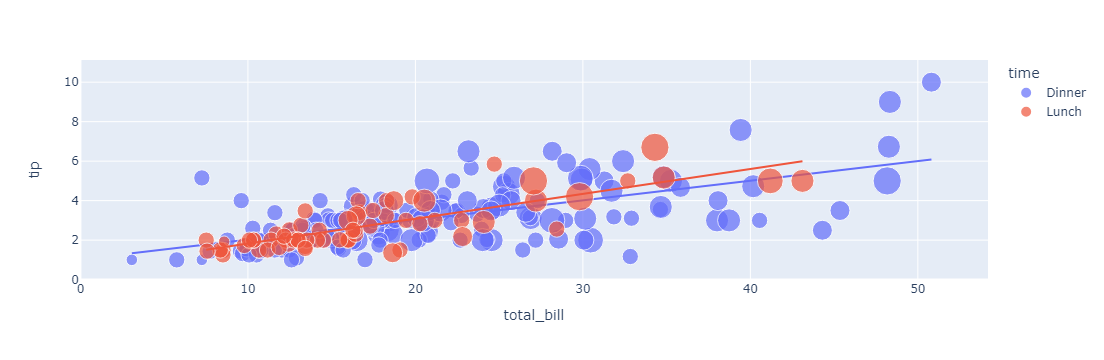

In [102]:
fig=px.scatter(data_frame=data,
               x='total_bill',
               y='tip',
               size='size',
               color='time',
               trendline='ols')
fig.show()

# Q.5: Now check the tips given to the waiters according to the days to find out which day the most tips are given to the waiters:


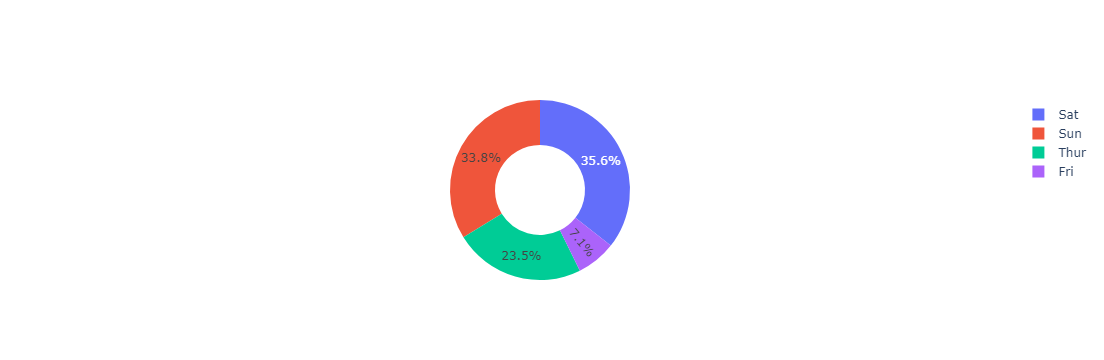

In [103]:
Labels=data['day']
Values=data['tip']
Data=go.Pie(labels=Labels,values=Values,hole=0.5)
fig=go.Figure(data=[Data])
fig.show()


# Q.6: look at the number of tips given to waiters by gender of the person paying the bill to see who tips waiters the most:

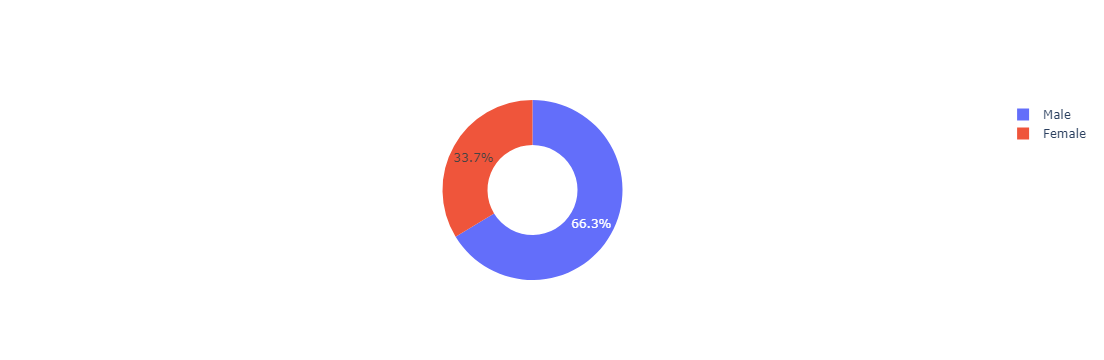

In [104]:
Labels=data['sex']
Values=data['tip']
Data=go.Pie(labels=Labels,values=Values,hole=0.5)
fig=go.Figure(data=[Data])
fig.show()

# Q.7: Now check the tips given to the waiters according to the days to find out which day the most tips are given to the waiters:


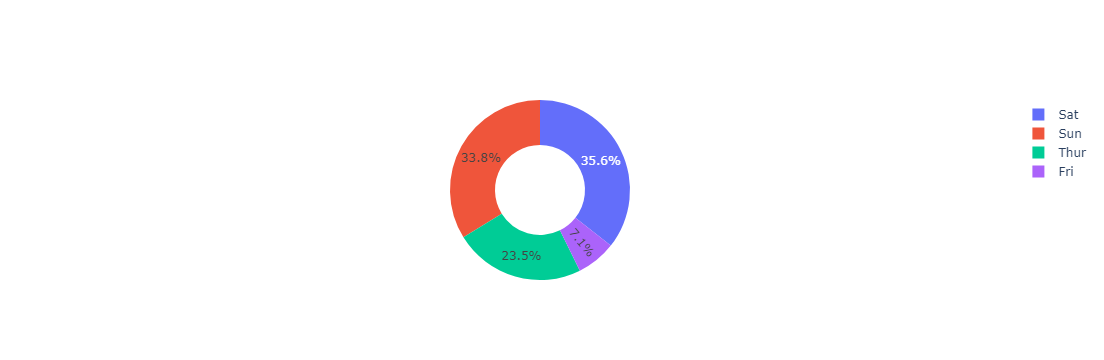

In [105]:
Labels=data['day']
Values=data['tip']
Data=go.Pie(labels=Labels,values=Values,hole=0.5)
fig=go.Figure(data=[Data])
fig.show()

# Q.8: let’s see if a smoker tips more or a non-smoker:

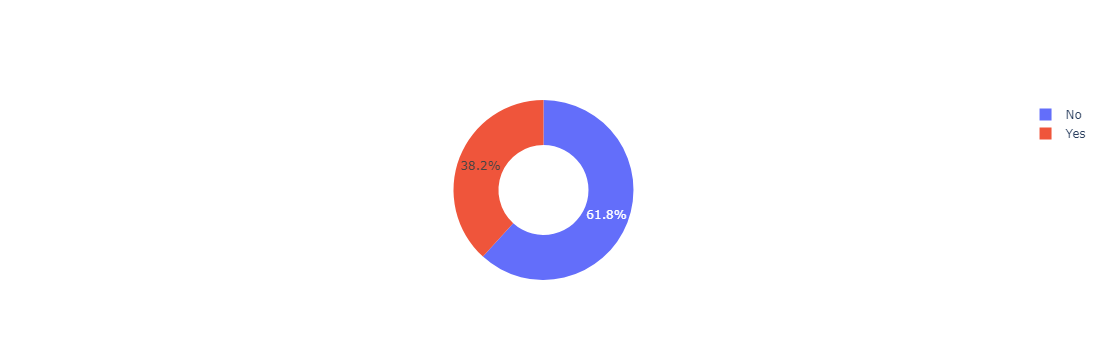

In [106]:
Labels=data['smoker']
Values=data['tip']
Data=go.Pie(labels=Labels,values=Values,hole=0.5)
fig=go.Figure(data=[Data])
fig.show()

# Q.9: Now let’s see if most tips are given during lunch or dinner:

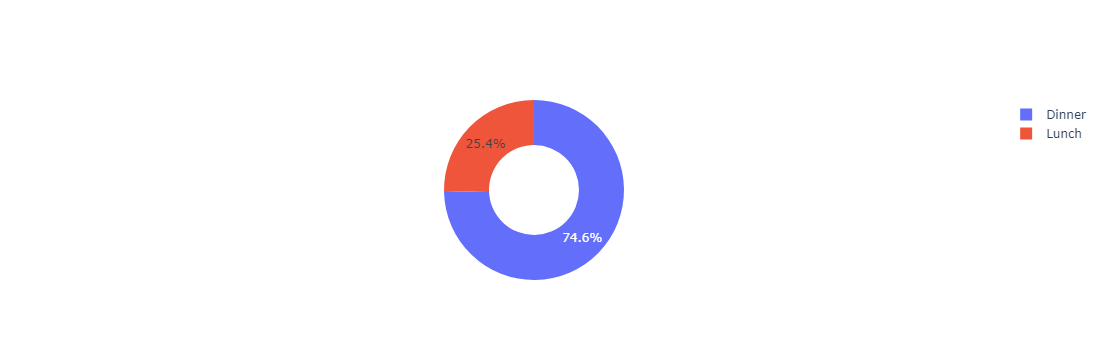

In [107]:
Labels=data['time']
Values=data['tip']
Data=go.Pie(labels=Labels,values=Values,hole=0.5)
fig=go.Figure(data=[Data])
fig.show()

# Q.10: Before training a waiter tips prediction model, do some data transformation by transforming the categorical values into numerical values:


In [108]:
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [110]:
map_smoker={'No':0,'Yes':'1'}
map_sex={'Female':0,'Male':1}
map_time={'Dinner':1,'Lunch':0}
map_day={'Thur':0,'Fri':1,'Sat':2,'Sun':3}
df=pd.DataFrame(data)
df['smoker']=df['smoker'].map(map_smoker)
df['sex']=df['sex'].map(map_sex)
df['time']=df['time'].map(map_time)
df['day']=df['day'].map(map_day)
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


# Q.11: Now split the data into training and test sets. Then train a machine learning model (Linear Regression) for the task of waiter tips prediction.


In [112]:
X=df[['total_bill','sex','smoker','day','time','size']]
y=df['tip']

In [113]:
X.head(5)

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,3,1,2
1,10.34,1,0,3,1,3
2,21.01,1,0,3,1,3
3,23.68,1,0,3,1,2
4,24.59,0,0,3,1,4


In [114]:
y.head(5)

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [117]:
X_train

,total_bill,sex,smoker,day,time,size
228,13.28,1,0,2,1,2
208,24.27,1,1,2,1,2
96,27.28,1,1,1,1,2
167,31.71,1,0,3,1,4
84,15.98,1,0,0,0,2
...,...,...,...,...,...,...
106,20.49,1,1,2,1,2
14,14.83,0,0,3,1,2
92,5.75,0,1,1,1,2
179,34.63,1,1,3,1,2


In [120]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [121]:
model.predict(X_test)

array([2.95915033, 1.9793852 , 3.93355525, 3.81512843, 2.17478172,
       2.65950784, 3.65751199, 2.30684737, 2.5469726 , 2.27028847,
       2.87845875, 2.10446382, 2.13402126, 2.33746574, 1.84729628,
       3.12055033, 2.97055543, 3.18916799, 2.61631688, 5.73865153,
       3.48064358, 3.26948544, 2.23303951, 1.98924641, 3.15115427,
       2.25680834, 2.12104595, 3.26905178, 3.17236483, 6.62813881,
       4.9784413 , 1.6371344 , 3.23322391, 2.82236266, 2.96117781,
       3.86625614, 1.97848176, 5.48228412, 2.37106691, 3.04713105,
       2.07990929, 2.49950599, 3.41299197, 2.3340929 , 1.94813896,
       0.93957882, 1.88172086, 3.08438206, 1.86676908])

# Q.12: Check your model prediction .

In [124]:
total_bill = float(input("Enter total bill amount: "))
sex = int(input("Enter sex (0 for Female, 1 for Male): "))
smoker = int(input("Enter smoker status (0 for No, 1 for Yes): "))
day = int(input("Enter day (0 for Sun, 1 for Mon, 2 for Tue, 3 for Wed, 4 for Thur, 5 for Fri, 6 for Sat): "))
time = int(input("Enter time (0 for Lunch, 1 for Dinner): "))
size = int(input("Enter size of the party: "))

# Preprocess input data
input_array = np.array([
    total_bill,
    sex,
    smoker,
    day,
    time,
    size
]).reshape(1, -1)  # Reshape to match the format expected by the model (1 sample, 6 features)

# Make prediction using the trained model
prediction = model.predict(input_array)

print("Output:", prediction)


Enter total bill amount:  24.50
Enter sex (0 for Female, 1 for Male):  1
Enter smoker status (0 for No, 1 for Yes):  0
Enter day (0 for Sun, 1 for Mon, 2 for Tue, 3 for Wed, 4 for Thur, 5 for Fri, 6 for Sat):  0
Enter time (0 for Lunch, 1 for Dinner):  1
Enter size of the party:  4


Output: [3.73742609]


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

